In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [2]:
from google.colab import drive
from os import listdir,chdir
drive.mount('/content/drive/')
chdir('/content/drive/MyDrive/Proyecto Integrador/Version 3')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%time datos = pd.read_csv('data_equilibrada.csv')

CPU times: user 112 ms, sys: 38.1 ms, total: 150 ms
Wall time: 176 ms


In [4]:
datos.shape

(10532, 3)

In [5]:
%time datos.tokens=datos.tokens.apply(literal_eval)

CPU times: user 2.49 s, sys: 82 ms, total: 2.58 s
Wall time: 2.61 s


In [6]:
outliers = pd.read_csv('outliers_medianas_2.csv').outliers
datos.drop(index=outliers.values,inplace=True)

In [7]:
bow = pd.read_csv('bow.csv')

In [8]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

CPU times: user 770 ms, sys: 45.8 ms, total: 816 ms
Wall time: 822 ms


In [9]:
tfidf

,info,make,requir,inc,date,immedi,account,voltag,compani,fax,confirm,dunde,process,recipi,arbor,zgi,holcim,addit,home,support,provid,delet,encrypt,chang,sourc,industri,work,offic,want,ssn,imag,mylif,get,research,qti,know,view,form,resolut,hello,...,even,rout,audit,wednesday,confer,remind,act,swr,section,mortgag,beam,differ,atlant,qualiti,point,happen,invit,handl,import,recent,found,vega,histori,chicago,financi,fiori,leav,vylnbsyxrmb,seminar,depend,wed,none,test,thursday,step,inquiri,reserv,appli,futur,mqvoxdsxwki
0,0.223482,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.220847,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.239421,0.229699,0.0,0.0,0.251389,0.229033,0.0,0.000000,0.0,0.0,0.228208,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.077426,0.078593,0.0,0.000000,0.080448,0.000000,0.0,0.0,0.180256,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.080146,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.08209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.125446,0.0,0.0,0.0,0.0,0.000000,0.372321,0.0,0.000000,0.000000,0.132149,0.0,0.0,0.000000,0.0,0.0,0.0,0.123967,0.0,0.0,0.000000,0.000000,0.0,0.13851,0.0,0.000000,0.0,0.0,0.000000,0.128936,0.0,0.0,0.000000,0.000000,0.0,0.137321,0.0,0.0,0.128099,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,0.415453,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.218826,0.0,0.0,0.000000,0.0,0.0,0.0,0.205277,0.0,0.0,0.218381,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.222541,0.213505,0.0,0.0,0.000000,0.212886,0.0,0.000000,0.0,0.0,0.212119,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9585,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9586,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.etiquetas.values, test_size=0.2, random_state=42)

In [11]:
logreg = LogisticRegression(C=5,l1_ratio=0.5,penalty='elasticnet',max_iter=1000,solver='saga',multi_class='multinomial',n_jobs=-1)
logreg.fit(X_train, y_train)

predicciones_train=logreg.predict(X_train)
predicciones_test=logreg.predict(X_test)
confusion_matrix(y_train,predicciones_train)

array([[1946,    3,   46,  122,  107],
       [  20, 1167,  148,    3,    3],
       [ 145,   49, 1316,   41,   51],
       [ 165,    3,   35, 1053,  116],
       [ 113,    0,   18,  147,  854]])

In [12]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
# l1_ratios=[i/10 for i in range(0,11)]
l1_ratios=np.arange(0,1.05,0.05)
for l1_ratio in l1_ratios:
    print("l1_ratio:",l1_ratio)
    logreg = LogisticRegression(l1_ratio=l1_ratio,penalty='elasticnet',max_iter=1000,solver='saga',multi_class='multinomial',n_jobs=-1)
    logreg.fit(X_train, y_train)

    predicciones_train=logreg.predict(X_train)
    predicciones_test=logreg.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))

    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

l1_ratio: 0.0
Train:
[[1926    6   37  141  114]
 [  31 1144  154    8    4]
 [ 188   70 1249   38   57]
 [ 186    2   33 1037  114]
 [ 133    1   13  173  812]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      2224
           1       0.94      0.85      0.89      1341
           2       0.84      0.78      0.81      1602
           3       0.74      0.76      0.75      1372
           4       0.74      0.72      0.73      1132

    accuracy                           0.80      7671
   macro avg       0.81      0.79      0.80      7671
weighted avg       0.81      0.80      0.80      7671

Test:
[[455   4  18  42  36]
 [ 13 301  34   3   1]
 [ 61  23 284  17  18]
 [ 49   0  12 239  36]
 [ 44   0   2  55 171]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       555
           1       0.92      0.86      0.89       352
           2       0.81      0.70      0.75       403
          

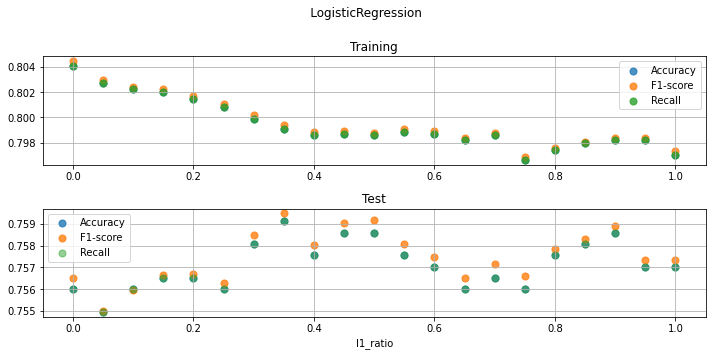

In [13]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     LogisticRegression")

ax[0].scatter(l1_ratios,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(l1_ratios,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(l1_ratios,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(l1_ratios,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(l1_ratios,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(l1_ratios,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('l1_ratio')

plt.show()

In [15]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
# l1_ratios=[i/10 for i in range(0,11)]
Cs=np.arange(1,11)
for C in Cs:
    print("C:",C)
    logreg = LogisticRegression(C=C,l1_ratio=0.35,penalty='elasticnet',max_iter=1000,solver='saga',multi_class='multinomial',n_jobs=-1)
    logreg.fit(X_train, y_train)

    predicciones_train=logreg.predict(X_train)
    predicciones_test=logreg.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))

    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

C: 1
Train:
[[1915    6   38  155  110]
 [  33 1145  153    7    3]
 [ 193   80 1238   37   54]
 [ 187    3   33 1035  114]
 [ 140    1   12  182  797]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      2224
           1       0.93      0.85      0.89      1341
           2       0.84      0.77      0.80      1602
           3       0.73      0.75      0.74      1372
           4       0.74      0.70      0.72      1132

    accuracy                           0.80      7671
   macro avg       0.80      0.79      0.79      7671
weighted avg       0.80      0.80      0.80      7671

Test:
[[458   4  15  47  31]
 [ 12 303  33   3   1]
 [ 60  26 283  17  17]
 [ 50   1  11 239  35]
 [ 39   0   2  58 173]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       555
           1       0.91      0.86      0.88       352
           2       0.82      0.70      0.76       403
           3       

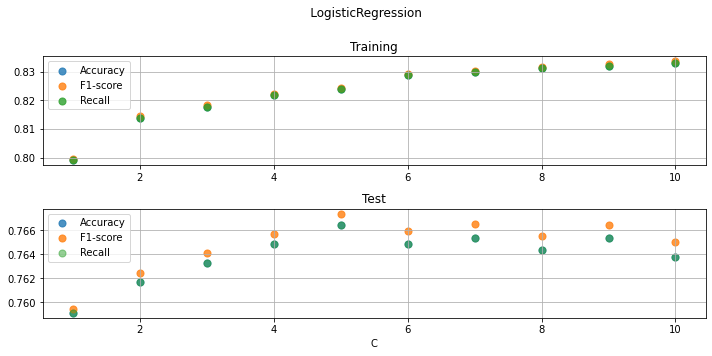

In [16]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     LogisticRegression")

ax[0].scatter(Cs,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(Cs,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(Cs,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(Cs,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(Cs,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(Cs,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('C')

plt.show()

In [17]:
cms_train=[]
cms_test=[]
scores_train = []
scores_test = []
knn = LogisticRegression(penalty='none',max_iter=12000,solver='saga',multi_class='multinomial',n_jobs=-1)
knn.fit(X_train, y_train)

predicciones_train=knn.predict(X_train)
predicciones_test=knn.predict(X_test)

print("Train:")
print(confusion_matrix(y_train,predicciones_train))
print(classification_report(y_train,predicciones_train))

print("Test:")
print(confusion_matrix(y_test,predicciones_test))
print(classification_report(y_test,predicciones_test))

Train:
[[1972    0   55  109   88]
 [   0 1209  130    1    1]
 [  82   26 1419   33   42]
 [ 139    0   25 1096  112]
 [  76    0   23  124  909]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2224
           1       0.98      0.90      0.94      1341
           2       0.86      0.89      0.87      1602
           3       0.80      0.80      0.80      1372
           4       0.79      0.80      0.80      1132

    accuracy                           0.86      7671
   macro avg       0.86      0.86      0.86      7671
weighted avg       0.86      0.86      0.86      7671

Test:
[[430  12  24  47  42]
 [  9 298  39   6   0]
 [ 48  19 297  15  24]
 [ 46   6  15 230  39]
 [ 33   4   6  51 178]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       555
           1       0.88      0.85      0.86       352
           2       0.78      0.74      0.76       403
           3       0.66 